In [26]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
uber_ride = pd.read_csv("uber.csv")
uber_ride.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [28]:
uber_ride = uber_ride.drop(['Unnamed: 0', 'key'], axis= 1)

In [29]:
uber_ride.dropna(axis= 0)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [30]:
uber_ride.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [31]:
def haversine(long1, long2, lat1, lat2):
    long1, long2, lat1, lat2 = map(np.radians, [long1, long2, lat1, lat2])

    diff_long = long2 - long1
    diff_lat = lat2 - lat1
    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +
                                      np.cos(lat1) * np.cos(lat2) * np.sin(diff_long/2.0)**2))

    return km

In [32]:
uber_pre_process = uber_ride
uber_pre_process['Distance'] = haversine(uber_pre_process['pickup_longitude'],uber_pre_process['dropoff_longitude'],
                             uber_pre_process['pickup_latitude'],uber_pre_process['dropoff_latitude'])
uber_pre_process['Distance'] = uber_pre_process['Distance'].astype(float).round(2)

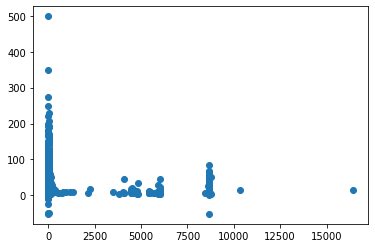

In [33]:
plt.scatter(uber_pre_process['Distance'], uber_pre_process['fare_amount'])

In [34]:
uber_pre_process.drop(uber_pre_process[uber_pre_process['Distance'] > 75].index, inplace=True)
uber_pre_process.drop(uber_pre_process[uber_pre_process['Distance'] == 0].index, inplace=True)
uber_pre_process.drop(uber_pre_process[uber_pre_process['fare_amount'] == 0].index, inplace=True)
uber_pre_process.drop(uber_pre_process[uber_pre_process['fare_amount'] < 0].index, inplace=True)

In [35]:
uber_2 = uber_pre_process

In [36]:
uber_2.drop(uber_2[(uber_2['fare_amount']>100) & (uber_2['Distance']<1)].index, inplace = True )
uber_2.drop(uber_2[(uber_2['fare_amount']<100) & (uber_2['Distance']>100)].index, inplace = True )

In [37]:
uber_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193486 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193486 non-null  float64
 1   pickup_datetime    193486 non-null  object 
 2   pickup_longitude   193486 non-null  float64
 3   pickup_latitude    193486 non-null  float64
 4   dropoff_longitude  193485 non-null  float64
 5   dropoff_latitude   193485 non-null  float64
 6   passenger_count    193486 non-null  int64  
 7   Distance           193485 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.3+ MB


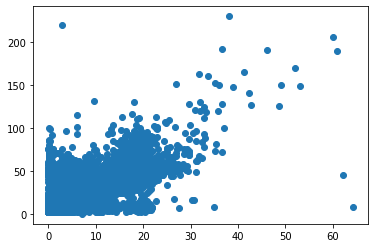

In [38]:
plt.scatter(uber_2['Distance'], uber_2['fare_amount'])

In [39]:
uber_2['pickup_datetime'] = pd.to_datetime(uber_2['pickup_datetime'])
uber_2['Year'] = uber_2['pickup_datetime'].apply(lambda time: time.year)
uber_2['Month'] = uber_2['pickup_datetime'].apply(lambda time: time.month)
uber_2['Day'] = uber_2['pickup_datetime'].apply(lambda time: time.day)
uber_2['Hour'] = uber_2['pickup_datetime'].apply(lambda time: time.hour)
uber_2['Day of Week'] = uber_2['pickup_datetime'].apply(lambda time: time.dayofweek)
day_map = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6'}
uber_2['Day of Week'] = uber_2['Day of Week'].map(day_map)

In [40]:
uber_2 = uber_2.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_latitude', 'dropoff_longitude'], axis = 1)
uber_2

,fare_amount,passenger_count,Distance,Year,Month,Day,Hour,Day of Week
0,7.5,1,1.68,2015,5,7,19,3
1,7.7,1,2.46,2009,7,17,20,4
2,12.9,1,5.04,2009,8,24,21,0
3,5.3,3,1.66,2009,6,26,8,4
4,16.0,5,4.48,2014,8,28,17,3
...,...,...,...,...,...,...,...,...
199995,3.0,1,0.11,2012,10,28,10,6
199996,7.5,1,1.88,2014,3,14,1,4
199997,30.9,2,12.85,2009,6,29,0,0
199998,14.5,1,3.54,2015,5,20,14,2


In [41]:
uber_2.corr()

,fare_amount,passenger_count,Distance,Year,Month,Day,Hour
fare_amount,1.000000,0.013364,0.892294,0.123439,0.024488,-0.000310,-0.019690
passenger_count,0.013364,1.000000,0.007256,0.005372,0.009993,0.003708,0.013397
Distance,0.892294,0.007256,1.000000,0.026531,0.012428,0.000246,-0.032243
Year,0.123439,0.005372,0.026531,1.000000,-0.115477,-0.012311,0.001863
Month,0.024488,0.009993,0.012428,-0.115477,1.000000,-0.017110,-0.004256
Day,-0.000310,0.003708,0.000246,-0.012311,-0.017110,1.000000,0.005331
Hour,-0.019690,0.013397,-0.032243,0.001863,-0.004256,0.005331,1.000000


In [ ]:
from sklearn.feature_selection import f_regression
Y = uber_2['fare_amount'].values.reshape(-1, 1)
X = uber_2.drop(['fare_amount'], axis=1)
f_regression(X,Y)[1].round(3)